# Importing Libraries

In [40]:
import numpy as np
import pandas as pd
from scipy.stats import norm,iqr
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import math

from sklearn.decomposition import PCA
import scipy

# Loading Data

In [41]:
def loadData(file_name, direction):
    # Read file into dataframe
    group_data = pd.read_csv(file_name)
    
    if direction == 'forward':
        # Change coloumn names
        group_data.columns = ["forward_x", "forward_y", "forward_orientation"]
        
    elif direction == 'left':
        # Change coloumn names
        group_data.columns = ["left_x", "left_y", "left_orientation"]
        
    elif direction == 'right':
        # Change coloumn names
        group_data.columns = ["right_x", "right_y", "right_orientation"]
    
    return group_data

In [42]:
group_data_1_forward = loadData('group-1/Forward.csv', 'forward')
group_data_1_left = loadData('group-1/Left.csv', 'left')
group_data_1_right = loadData('group-1/Right.csv', 'right')

group_data_2_forward = loadData('group-2/Forward.csv','forward')
group_data_2_left = loadData('group-2/Left.csv', 'left')
group_data_2_right = loadData('group-2/Right.csv', 'right')

group_data_3_forward = loadData('group-3/Forward.csv','forward')
group_data_3_left = loadData('group-3/Left.csv', 'left')
group_data_3_right = loadData('group-3/Right.csv', 'right')

group_data_4_forward = loadData('group-4/Forward.csv','forward')
group_data_4_left = loadData('group-4/Left.csv', 'left')
group_data_4_right = loadData('group-4/Right.csv', 'right')

group_data_5_forward = loadData('group-5/Forward.csv','forward')
group_data_5_left = loadData('group-5/Left.csv', 'left')
group_data_5_right = loadData('group-5/Right.csv', 'right')

group_data_6_forward = loadData('group-6/Forward.csv','forward')
group_data_6_left = loadData('group-6/Left.csv', 'left')
group_data_6_right = loadData('group-6/Right.csv', 'right')

In [43]:
# Converting prissy group 6's data to deg 
group_data_6_forward['forward_orientation'] = np.rad2deg(group_data_6_forward['forward_orientation'])-90.0
group_data_6_right['right_orientation'] = np.rad2deg(group_data_6_right['right_orientation'])-90.0
group_data_6_left['left_orientation'] = group_data_6_left['left_orientation']-90.0

In [168]:
# Merge data using only data from group 1 and 4 

# groups_forward = [group_data_1_forward, group_data_2_forward, group_data_3_forward,
#                   group_data_4_forward, group_data_5_forward, group_data_6_forward]
# groups_left = [group_data_1_left, group_data_2_left, group_data_3_left,
#                group_data_4_left, group_data_5_left, group_data_6_left]
# groups_right = [group_data_1_right, group_data_2_right, group_data_3_right,
#                group_data_4_right, group_data_5_right, group_data_6_right]

groups_forward = [group_data_4_forward, group_data_1_forward]
groups_left    = [group_data_4_left, group_data_1_left]
groups_right   = [group_data_4_right, group_data_1_right]

# groups_forward = [group_data_2_forward, group_data_3_forward]
# groups_left    = [group_data_2_left, group_data_3_left]
# groups_right   = [group_data_2_right, group_data_3_right]

merged_data_forward = pd.concat(groups_forward)
merged_data_left = pd.concat(groups_left)
merged_data_right = pd.concat(groups_right)

merged_data = pd.concat([merged_data_forward,
                         merged_data_left,
                         merged_data_right], axis=1)

In [ ]:
merged_data

# Round values

In [169]:
merged_data = merged_data.round(decimals=2)
merged_data = merged_data.round(decimals=2)
merged_data = merged_data.round(decimals=2)

merged_data

merged_data.to_csv('out.csv', index=False) 

# Storing as numpy variables

In [170]:
forward_x           = np.array(merged_data['forward_x']) 
forward_y           = np.array(merged_data['forward_y']) 
forward_orientation = np.array(merged_data['forward_orientation']) 
left_x              = np.array(merged_data['left_x']) 
left_y              = np.array(merged_data['left_y']) 
left_orientation    = np.array(merged_data['left_orientation']) 
right_x             = np.array(merged_data['right_x']) 
right_y             = np.array(merged_data['right_y']) 
right_orientation   = np.array(merged_data['right_orientation']) 

data = [forward_x, forward_y, forward_orientation, 
        left_x,    left_y,    left_orientation,
        right_x,   right_y,   right_orientation]

forward = np.array([forward_x, forward_y, forward_orientation])
right = np.array([right_x, right_y, right_orientation])
left = np.array([left_x, left_y, left_orientation])

# Computing Mean, Mode, Median, Variance & Std Deviation

In [171]:
def mean_variance(data) -> (int, int):
    '''
    Compute mean, mode, median, 
    variance & standard deviation for data.
    
    Returns:
    ----------
    mu:  mean 
    std: standard deviation
    '''
    
    mu = np.mean(data)
    # median = np.median(data)
    # mode = np.mode(data)
    var = np.var(data)
    std = np.std(data)
    
    return mu, std

In [172]:
# mean_variance(group_data_4_right['orientation']) 

# Detecting Outliers

In [173]:
def detect_outliers(data, pp1 = 0.01, pp2 = 0.001) -> (int, np.array([])):
    '''
    Detect outliers based on Chebychev Theorem
    
    Returns
    ---------
    outliers_detected:  Number of outliers detected
    final_data_indices: Indices for filtered data
    '''
    
    outlier_data_indices = []
    
    mu1, sigma1 = mean_variance(data)
    k = 1 / np.sqrt(pp1)
    odv1u = mu1 + k * sigma1
    odv1l = mu1 - k * sigma1
    
    new_data = data[np.where(data <= odv1u)[0]]
    outlier_data_indices.append(list(np.where(data >= odv1u)[0]))
    
    new_data = new_data[np.where(new_data >= odv1l)[0]]
    outlier_data_indices.append(list(np.where(new_data <= odv1l)[0]))
    
    mu2, sigma2 = mean_variance(new_data)
    k = 1 / np.sqrt(pp2)
    odv2u = mu2 + k * sigma2
    odv2l = mu2 - k * sigma2
    final_data = new_data[np.where(new_data <= odv2u)[0]]
    outlier_data_indices.append(list(np.where(final_data >= odv2u)[0]))
    
    final_data = new_data[np.where(final_data >= odv2l)[0]]
    outlier_data_indices.append(list(np.where(final_data <= odv2l)[0]))
    
    return outlier_data_indices, final_data

In [228]:
def get_filtered_data(data):

    data_new = []
    outliers_detected = 0
    final_data_indices = []
    
    for data_points in data:
        final_data_indices.append(detect_outliers(data_points, 0.2, 0.01)[0])
        
    data_new = data.T
    
    # print(final_data_indices)
    # print(sum(sum(final_data_indices, []), []))
    
    for outlier_index in sum(sum(final_data_indices, []), []):
        data_new = np.delete(data_new, outlier_index, axis=0)
         
    outliers_detected = len(data.T) - len(data_new)
    
    return data_new, outliers_detected

forward_new, forward_outliers = (get_filtered_data(forward))
right_new, right_outliers     = (get_filtered_data(right))
left_new, left_outliers       = (get_filtered_data(left))

print(forward_outliers, right_outliers, left_outliers)

0 2 0


# PCA

In [175]:
def get_PCA(data, components = 3):
    X = data
    pca = PCA(n_components=components)
    pca.fit(X)
    return pca.transform(X)

forward_transformed = get_PCA(forward_new, 2).T
right_transformed = get_PCA(right_new, 2).T
left_transformed = get_PCA(left_new, 2).T

# Guassian Distribution 

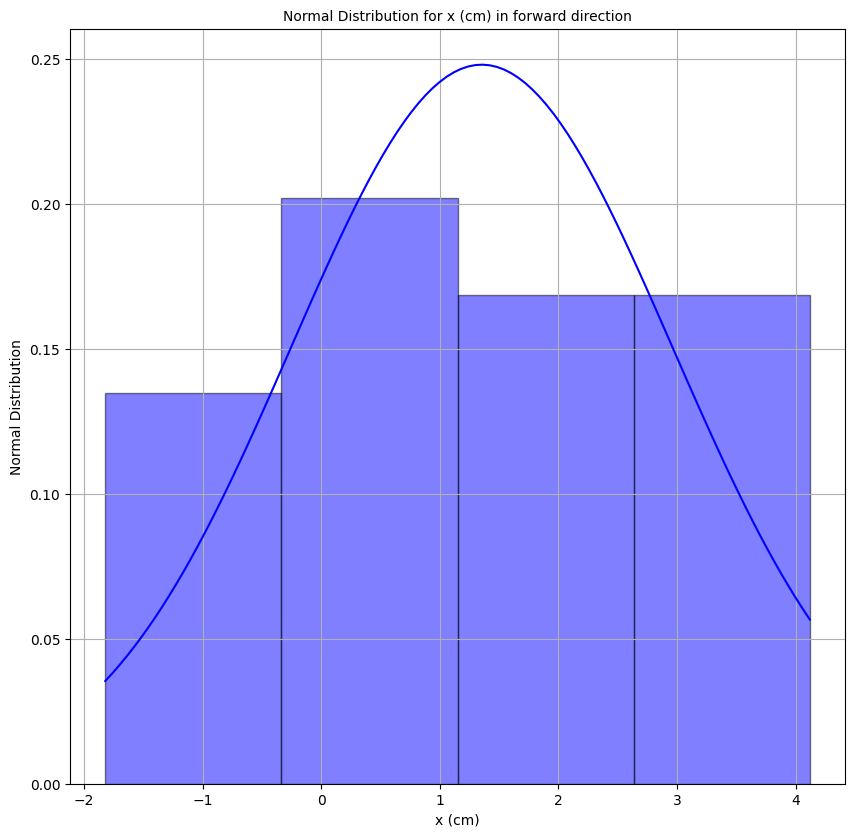

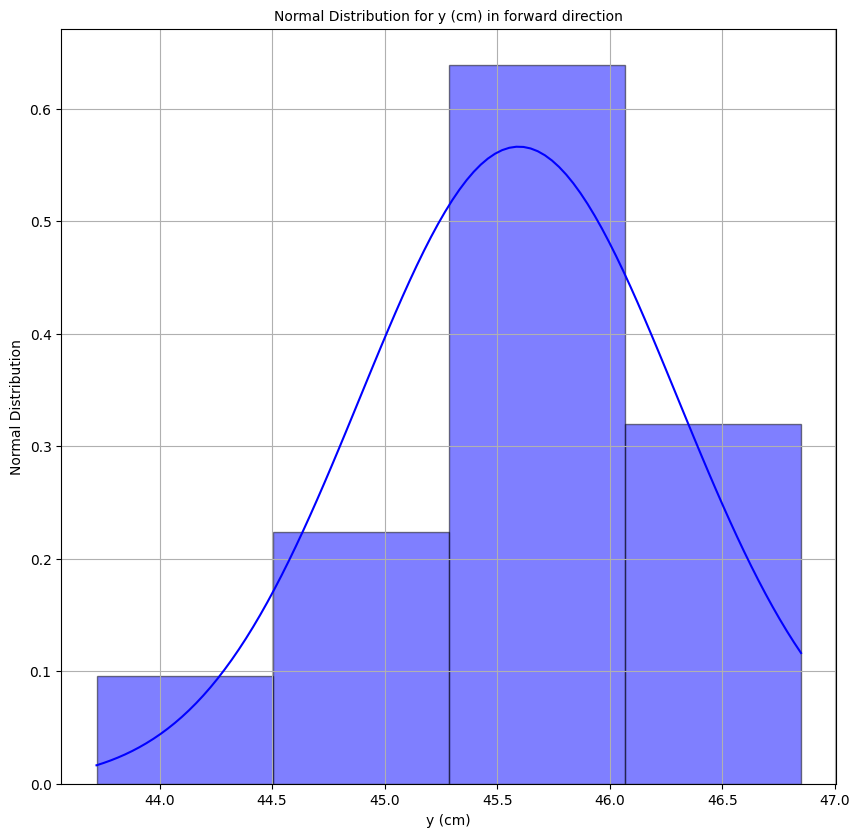

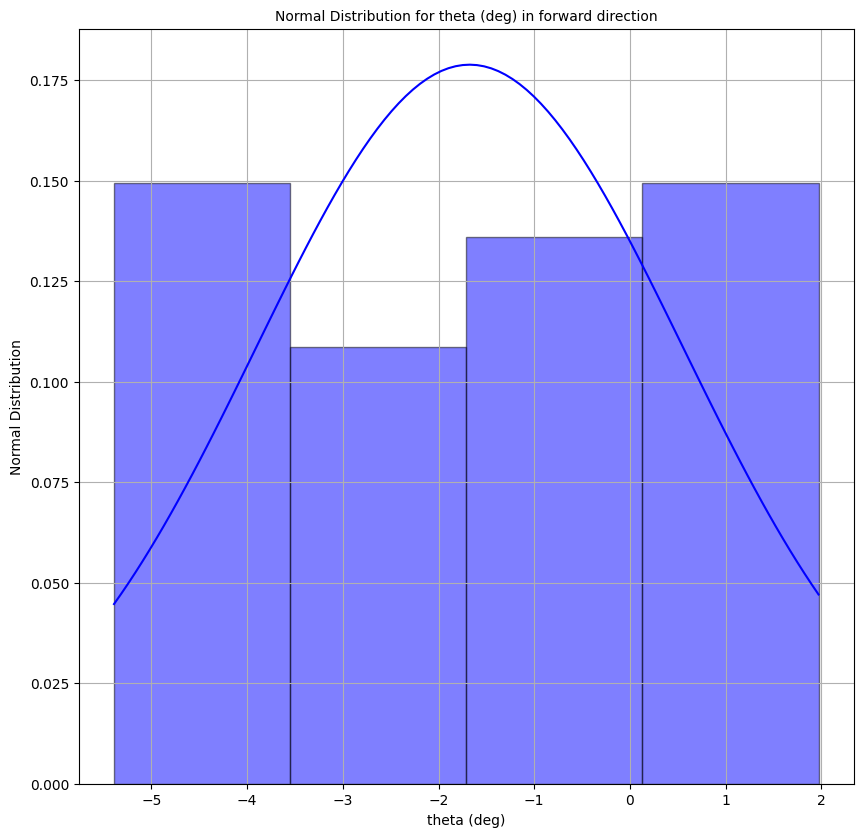

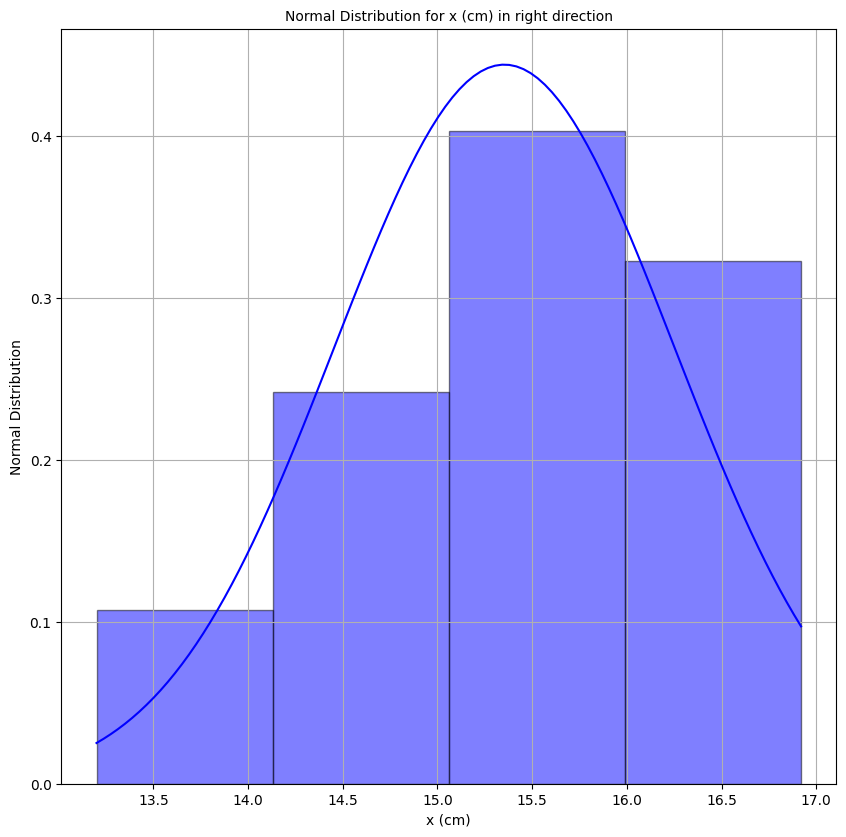

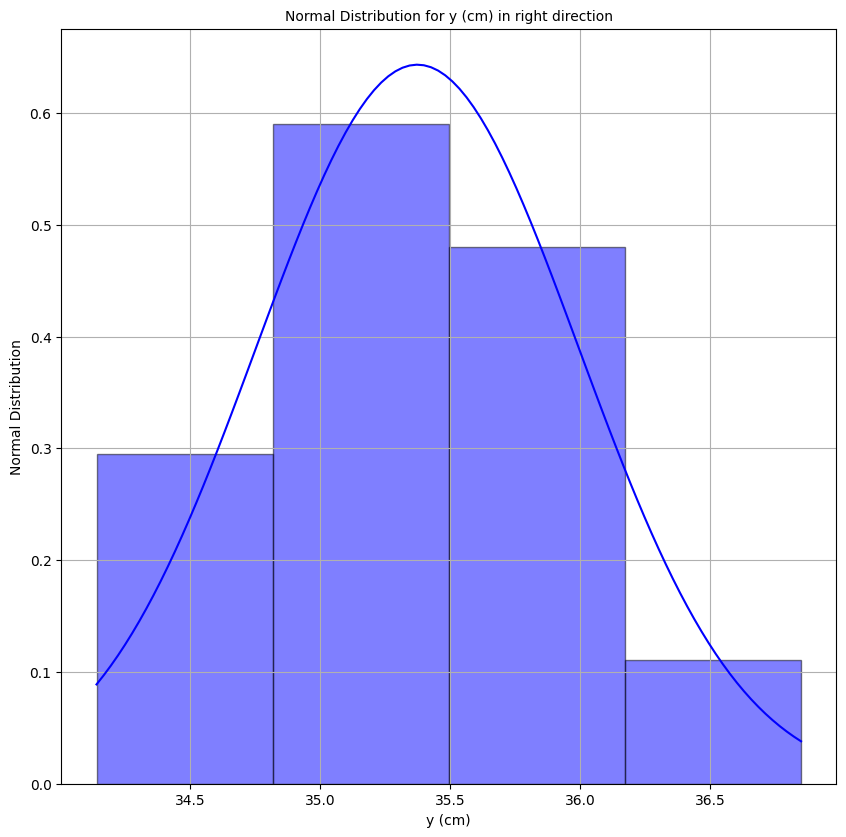

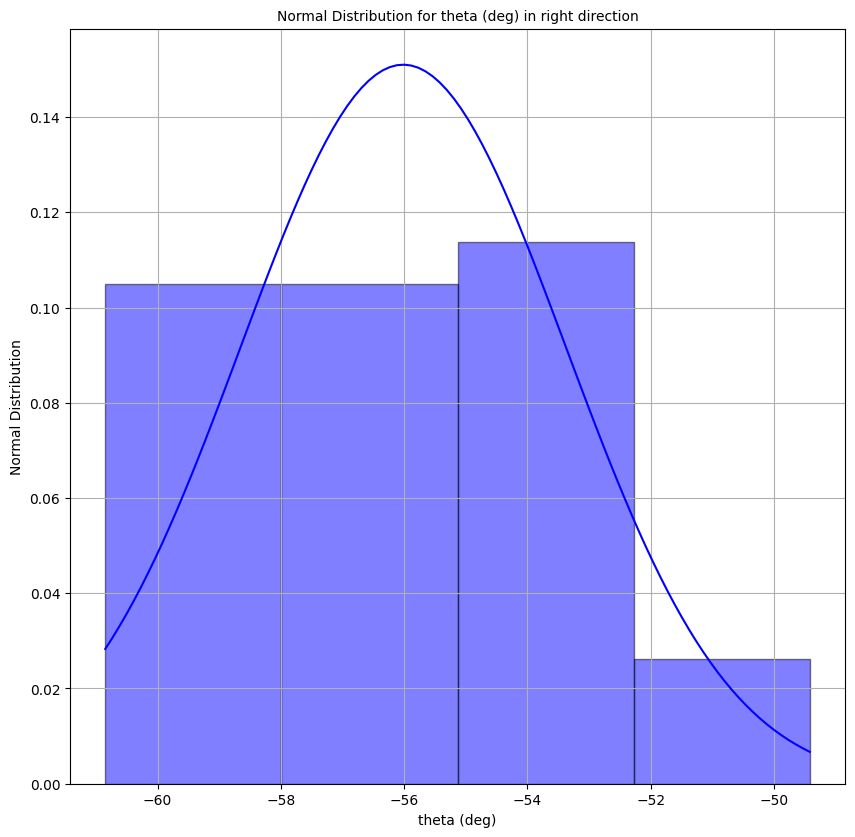

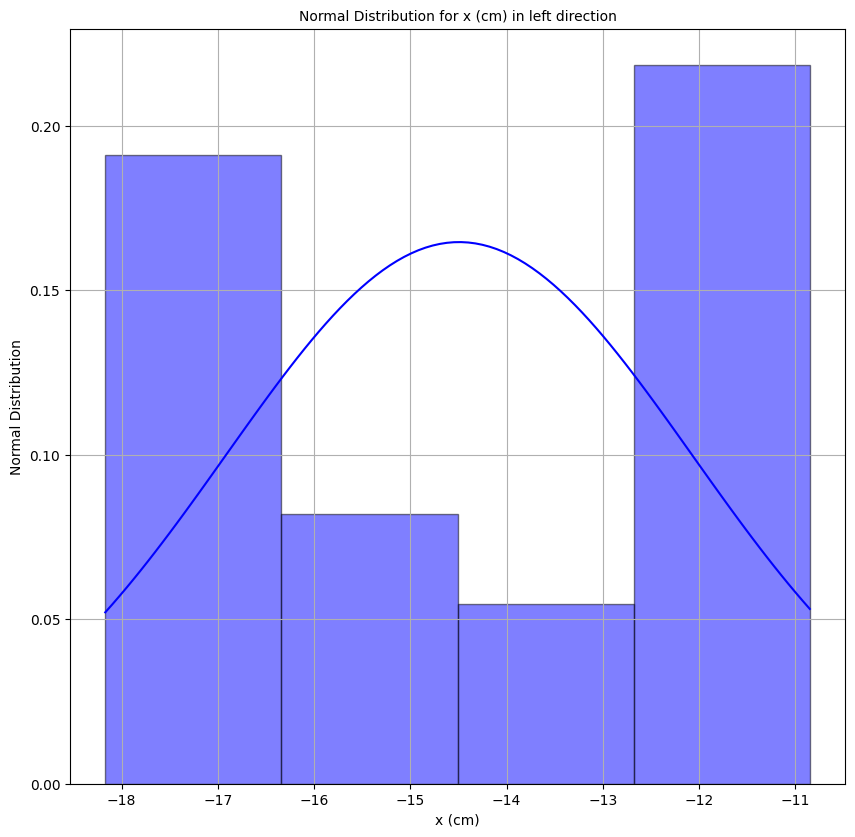

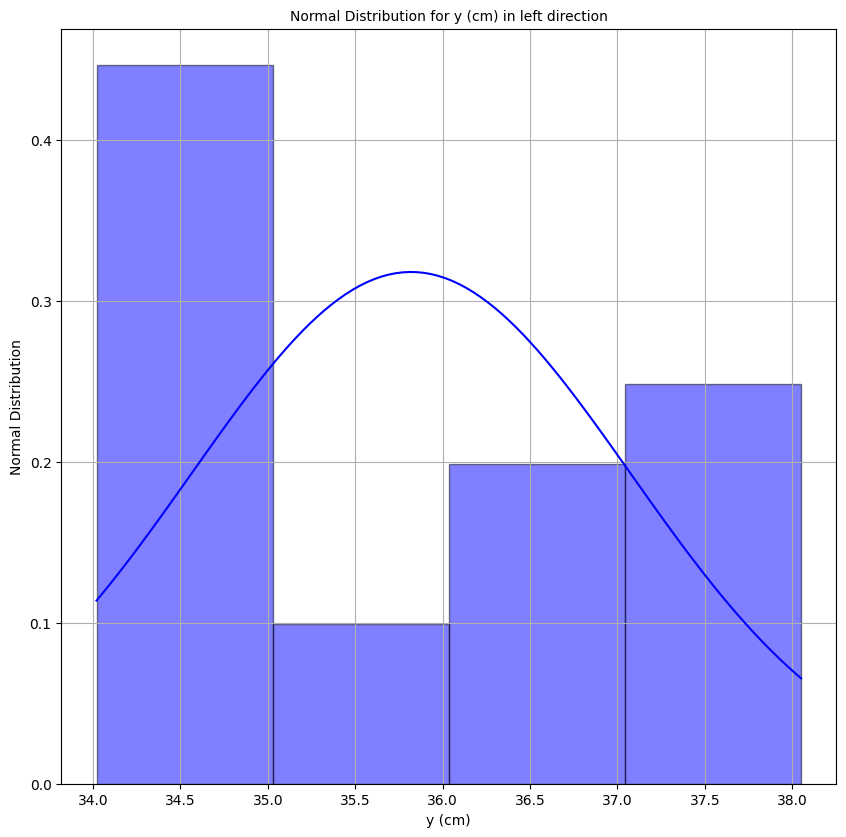

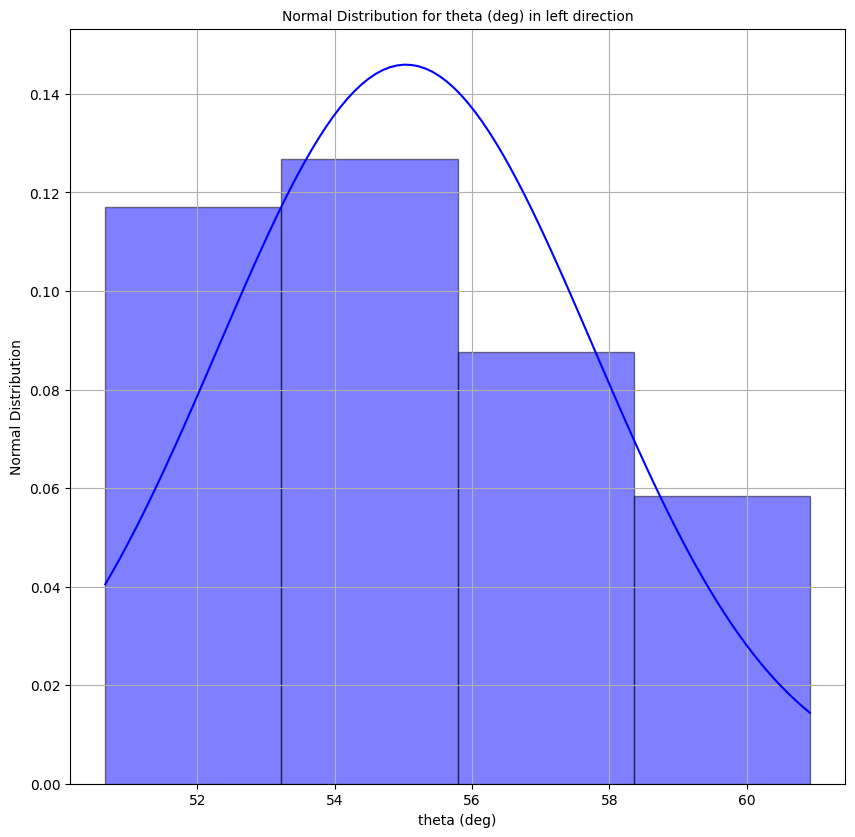

In [229]:
def plot_guassian_hist(data, direction, title):
    
    n_bins = int(1 + 3.32 * np.log(len(data)))
    
    for i in range(0, 3):
        
        mu, sigma = mean_variance(data[i])
        data_min = np.min(data[i])
        data_max = np.max(data[i])
        x = np.linspace(data_min, data_max, 100)
        y = scipy.stats.norm.pdf(x, mu, sigma)
        
        
        plt.figure(figsize=(10, 10), dpi=100)
        plt.plot(x,y, color='blue')
        plt.hist(data[i], bins=n_bins, facecolor='blue', alpha=0.5, density=True, edgecolor = 'black')

        plt.grid()
        plt.title('Normal Distribution for '+title[i]+' in '+direction+' direction', fontsize=10)

        plt.xlabel(title[i])
        plt.ylabel('Normal Distribution')
        
        plt.savefig("normal_distribution_"+direction+"_"+title[i]+".png", dpi=500, transparent=False)
        plt.show()
        
        
plot_guassian_hist(forward, 'forward', ['x (cm)', 'y (cm)', 'theta (deg)'])        
plot_guassian_hist(right, 'right', ['x (cm)', 'y (cm)', 'theta (deg)'])        
plot_guassian_hist(left, 'left', ['x (cm)', 'y (cm)', 'theta (deg)'])        

# Chi Square Test

In [203]:
def chi_squared_test(data):
    
    np.random.seed(1)
    
    actual_data = data
    actual_freq,_ = np.histogram(actual_data, bins=4)
    mean = np.mean(actual_data)
    std = np.std(actual_data) 
    true_data = np.random.normal(mean,std,len(data))
    true_freq,_ = np.histogram(true_data, bins=len(actual_freq))
    return (np.round(scipy.stats.chisquare(actual_freq, true_freq)[0], 2), 
            np.round(scipy.stats.chisquare(actual_freq, true_freq)[1], 2))

data_filtered = [forward_new, left_new, right_new]

for direction in data_filtered:
    for i in range(3):
        if chi_squared_test(direction.T[i])[1] < 0.01:
            print('Reject', chi_squared_test(direction.T[i]))
        else:
            print('Accept', chi_squared_test(direction.T[i]))

Reject (19.56, 0.0)
Reject (13.75, 0.0)
Reject (45.46, 0.0)
Reject (87.17, 0.0)
Reject (138.76, 0.0)
Reject (52.9, 0.0)
Accept (7.72, 0.05)
Accept (9.8, 0.02)
Reject (44.57, 0.0)


# Confidence Ellipse

In [178]:
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

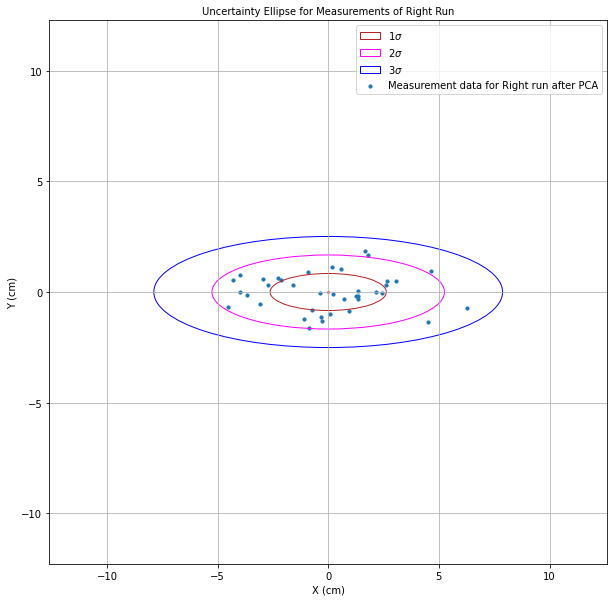

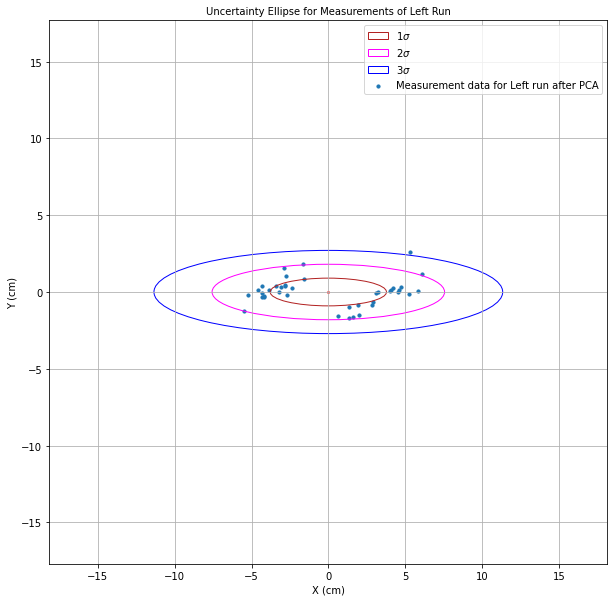

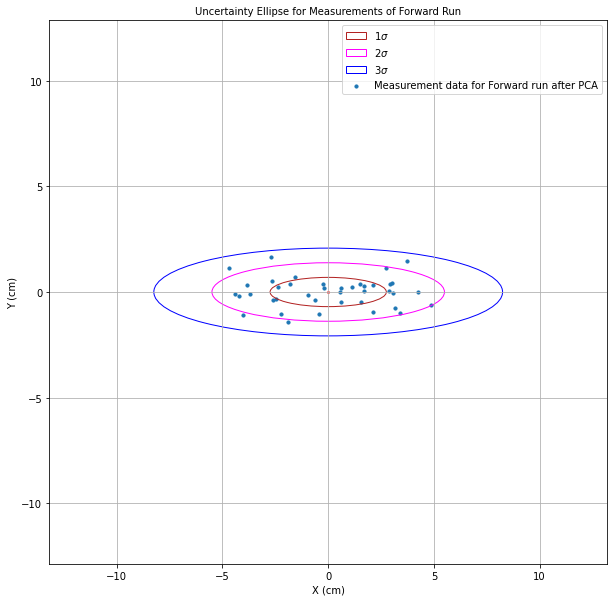

In [201]:
def plot_eelipse(x,y, title):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.margins(0.3, 0.3)
    
    # Scatter plot x and y
    plt.scatter(x, y, s=10, label = "Measurement data for " + title + " run after PCA")
    
    ellipses = []
    cov = np.cov(x, y)
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    
    # Ellipse for std = 1
    nstd = 1
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=w, height=h,
                  angle=theta, color='firebrick', label='$1\sigma$')

    ellipses.append(ell)
    ell.set_facecolor('none')
    ax.add_patch(ell)
    
    # Ellipse for std = 2
    nstd = 2
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=w, height=h,
                  angle=theta, color='fuchsia', label='$2\sigma$')
    ellipses.append(ell)
    ell.set_facecolor('none')
    ax.add_patch(ell)
    
    # Ellipse for std = 3
    nstd = 3
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=w, height=h,
                  angle=theta, color='blue', label='$3\sigma$')
    ellipses.append(ell)
    ell.set_facecolor('none')
    ax.add_patch(ell)
    
    # Plot
    plt.title('Uncertainty Ellipse for Measurements of ' + title +' Run', fontsize= 10)
    plt.xlabel('X (cm)', fontsize= 10)
    plt.ylabel('Y (cm)', fontsize= 10)
    ax.scatter(0, 0, c='red', s=3)
    plt.legend()
    plt.grid()
#     ax.set_aspect('equal')
    plt.axis('equal')
#     plt.xlim(-15,15)
    plt.savefig('Uncertainty Ellipse for Measurements of ' + title +' Run', dpi=500)
    
x = right_transformed[0]
y = right_transformed[1]
plot_eelipse(x,y, 'Right')

x = left_transformed[0]
y = left_transformed[1]
plot_eelipse(x,y, 'Left')

x = forward_transformed[0]
y = forward_transformed[1]
plot_eelipse(x,y, 'Forward')